# EDA Ventas

## Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Carga de Datos

In [3]:
precios = pd.read_excel('../data/raw/PreciosExcelArticulos1.xlsx')

In [4]:
articulos = pd.read_excel('../data/raw/MERCADO--ResumencopiaMacros.xls', header=1)

In [5]:
# diario = pd.read_excel('../../../Fact diaria TAB/1.10.2023.xls.xlsm', header=15)

In [6]:
compras = pd.read_excel('../data/raw/Productos compra-merdelar.xlsx')

## Primera Exploración

In [7]:
precios.head(10)

,NOMBRE,PRECIO 1,PRECIO 2,PRECIO 3,PRECIO 4
0,COLACAO,2.1,2.1,2.1,2.1
1,CAFE ESPECIAL,2.9,2.9,2.9,2.9
2,CAFE,2.1,2.1,2.1,2.1
3,SUPLEMENTO COLACAO,0.6,0.6,0.6,0.6
4,CHOCOLATE,2.9,2.9,2.9,2.9
5,SUPLEMENTO CAPUCHINO,0.6,0.6,0.6,0.6
6,INFUSION,2.5,2.5,2.5,2.5
7,IRISH COFFEE,6.5,6.5,6.5,6.5
8,COPA CERVEZA MAHOU,3.7,3.7,3.7,3.7
9,MAHOU SESSION IPA,4.7,4.7,4.7,4.7


In [8]:
precios.columns.drop(labels='PRECIO 2')
precios.columns.drop(labels='PRECIO 3')

Index(['NOMBRE', 'PRECIO 1', 'PRECIO 2', 'PRECIO 4'], dtype='object')

In [10]:
precios.dtypes

NOMBRE       object
PRECIO 1    float64
PRECIO 2    float64
PRECIO 3    float64
PRECIO 4    float64
dtype: object

In [11]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NOMBRE    388 non-null    object 
 1   PRECIO 1  388 non-null    float64
 2   PRECIO 2  388 non-null    float64
 3   PRECIO 3  388 non-null    float64
 4   PRECIO 4  388 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.3+ KB


In [12]:
precios.describe()

,PRECIO 1,PRECIO 2,PRECIO 3,PRECIO 4
count,388.000000,388.000000,388.000000,388.000000
mean,13.390464,13.390464,13.390464,13.390464
std,13.264878,13.264878,13.264878,13.264878
min,0.000000,0.000000,0.000000,0.000000
25%,4.987500,4.987500,4.987500,4.987500
50%,10.500000,10.500000,10.500000,10.500000
75%,16.700000,16.700000,16.700000,16.700000
max,120.000000,120.000000,120.000000,120.000000


In [13]:
precios.shape

(388, 5)

In [14]:
precios.columns

Index(['NOMBRE', 'PRECIO 1', 'PRECIO 2', 'PRECIO 3', 'PRECIO 4'], dtype='object')

In [50]:
articulos.head(20)

,NOMBRE,Unidades,Importe
Código,,,
102,COLACAO,9,17.18181
103,CAFE ESPECIAL,56,147.60907
4130,CAFE,3521,6553.97952
4135,CHOCOLATE,9,23.72725
4139,INFUSION,210,468.16379
6,VODKAS-TEQUILAS,NaN,NaN
601,ABSOLUT,22,195.45455
604,STOLICHNAYA ELIT,1,10.90909
607,VODKA TONIC GREY GOOSE,6,65.45454


In [15]:
articulos.dtypes

Código         object
Descripción    object
Unidades       object
Importe        object
dtype: object

In [16]:
articulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Código       192 non-null    object
 1   Descripción  175 non-null    object
 2   Unidades     175 non-null    object
 3   Importe      175 non-null    object
dtypes: object(4)
memory usage: 6.1+ KB


In [17]:
articulos.describe()

,Código,Descripción,Unidades,Importe
count,192,175,175,175
unique,156,152,104,155
top,TOTAL,Descripción,Unidades,Importe
freq,17,17,17,17


In [18]:
articulos.shape

(192, 4)

In [19]:
articulos.columns

Index(['Código', 'Descripción', 'Unidades', 'Importe'], dtype='object')

In [20]:
compras

,F. Creado,Denominación,Precio 1,Unidad referencia,Clasificación,Activo,IVA,IGIC,Código único GID,Escandallo,Suministros,F. Modificado
0,13/12/2023,HUEVAS NEGRAS,11.90,Bo,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322671,0,1,13/12/2023
1,13/12/2023,PUNTILLA CHINA SIN PLUMA 1KG,7.50,Kg,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322668,0,1,13/12/2023
2,12/12/2023,MORCILLA ASTURIANA,2.07,Kg,Alimentación | Charcutería | Embutidos,si,10%,0%,CUG-1322506,0,1,13/12/2023
3,12/12/2023,CHURRASCO TERNERA,6.90,Kg,Alimentación | Carnes frescas | Vacuno,si,10%,0%,CUG-1322501,0,1,13/12/2023
4,12/12/2023,TINTA DE CALAMAR,5.70,Bo,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322467,0,1,13/12/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
448,01/08/2023,PUERRO,1.75,Uds,Alimentación | Verduras frescas y hortalizas |...,si,0%,0%,47,0,3,13/12/2023
449,01/08/2023,PIÑA,1.75,Uds,Alimentación | Frutas | Fruta tropical,si,0%,0%,48,0,3,13/12/2023
450,01/08/2023,UVAS ROJAS,4.99,Mj,Alimentación | Frutas | Otras frutas,si,0%,0%,49,0,3,13/12/2023
451,01/08/2023,ZANAHORIA,1.19,Sc,Alimentación | Verduras frescas y hortalizas |...,si,0%,0%,50,0,3,13/12/2023


In [21]:
compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   F. Creado          453 non-null    object 
 1   Denominación       453 non-null    object 
 2   Precio 1           453 non-null    float64
 3   Unidad referencia  453 non-null    object 
 4   Clasificación      451 non-null    object 
 5   Activo             453 non-null    object 
 6   IVA                453 non-null    object 
 7   IGIC               453 non-null    object 
 8   Código único GID   453 non-null    object 
 9   Escandallo         453 non-null    int64  
 10  Suministros        453 non-null    int64  
 11  F. Modificado      453 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 42.6+ KB


## Cardinalildad

In [22]:
for i in precios:
    print(f'La cardinalidad de la variable {i} es {(precios[i].nunique()/precios.shape[0])*100:.2f}%')

La cardinalidad de la variable NOMBRE es 92.01%
La cardinalidad de la variable PRECIO 1 es 31.19%
La cardinalidad de la variable PRECIO 2 es 31.19%
La cardinalidad de la variable PRECIO 3 es 31.19%
La cardinalidad de la variable PRECIO 4 es 31.19%


In [23]:
for i in articulos.select_dtypes(include=object):
    print(f'La cardinalidad de la variable {i} es {(articulos[i].nunique()/articulos.shape[0])*100:.2f}%')

La cardinalidad de la variable Código es 81.25%
La cardinalidad de la variable Descripción es 79.17%
La cardinalidad de la variable Unidades es 54.17%
La cardinalidad de la variable Importe es 80.73%


In [51]:
for i in compras.select_dtypes(include=object):
    print(f'La cardinalidad de la variable {i} es {(compras[i].nunique()/compras.shape[0])*100:.2f}%')

La cardinalidad de la variable NOMBRE es 99.34%
La cardinalidad de la variable Unidad referencia es 4.64%
La cardinalidad de la variable Clasificación es 32.45%
La cardinalidad de la variable Activo es 0.22%
La cardinalidad de la variable IVA es 1.10%
La cardinalidad de la variable IGIC es 0.44%
La cardinalidad de la variable Código único GID es 100.00%


## Limpieza

In [24]:
articulos.set_index('Código', inplace=True)

In [25]:
articulos.rename(columns={'Descripción':'NOMBRE'}, inplace=True)

In [26]:
articulos = articulos.drop(labels='TOTAL', axis=0)
articulos = articulos.drop(labels='Código', axis=0)

In [ ]:
articulos['Familia'] = articulos['Descripción'].where(articulos['Unidades'].isnull())
articulos['Familia'].ffill(inplace=True)
articulos['Familia'].fillna('CAFE', inplace=True)
articulos.dropna(inplace=True)

In [29]:
precios.isnull().sum()

NOMBRE      0
PRECIO 1    0
PRECIO 2    0
PRECIO 3    0
PRECIO 4    0
dtype: int64

In [30]:
junto = pd.merge(articulos, precios, how='left')

In [31]:
junto.head(20)

,NOMBRE,Unidades,Importe,PRECIO 1,PRECIO 2,PRECIO 3,PRECIO 4
0,COLACAO,9,17.18181,2.1,2.1,2.1,2.1
1,CAFE ESPECIAL,56,147.60907,2.9,2.9,2.9,2.9
2,CAFE,3521,6553.97952,2.1,2.1,2.1,2.1
3,CHOCOLATE,9,23.72725,2.9,2.9,2.9,2.9
4,INFUSION,210,468.16379,2.5,2.5,2.5,2.5
5,VODKAS-TEQUILAS,NaN,NaN,NaN,NaN,NaN,NaN
6,ABSOLUT,22,195.45455,10.0,10.0,10.0,10.0
7,ABSOLUT,22,195.45455,10.0,10.0,10.0,10.0
8,STOLICHNAYA ELIT,1,10.90909,13.0,13.0,13.0,13.0
9,VODKA TONIC GREY GOOSE,6,65.45454,13.0,13.0,13.0,13.0


In [32]:
junto['NOMBRE'] = junto['NOMBRE'].drop_duplicates()
junto.dropna(inplace=True)
junto.drop(columns=['PRECIO 2', 'PRECIO 3', 'PRECIO 4'], inplace=True)

In [33]:
junto['Unidades'] = junto['Unidades'].astype(int)
junto['Importe'] = junto['Importe'].astype(float).round(2)

In [34]:
junto

,NOMBRE,Unidades,Importe,PRECIO 1
0,COLACAO,9,17.18,2.1
1,CAFE ESPECIAL,56,147.61,2.9
2,CAFE,3521,6553.98,2.1
3,CHOCOLATE,9,23.73,2.9
4,INFUSION,210,468.16,2.5
...,...,...,...,...
180,BOMBAY SAPHIRE,18,180.00,12.0
181,HENDRICS,15,150.00,13.0
182,SEAGRAMS,45,409.09,11.0
183,BULLDOG GIN,3,30.00,13.0


In [35]:
compras

,F. Creado,Denominación,Precio 1,Unidad referencia,Clasificación,Activo,IVA,IGIC,Código único GID,Escandallo,Suministros,F. Modificado
0,13/12/2023,HUEVAS NEGRAS,11.90,Bo,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322671,0,1,13/12/2023
1,13/12/2023,PUNTILLA CHINA SIN PLUMA 1KG,7.50,Kg,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322668,0,1,13/12/2023
2,12/12/2023,MORCILLA ASTURIANA,2.07,Kg,Alimentación | Charcutería | Embutidos,si,10%,0%,CUG-1322506,0,1,13/12/2023
3,12/12/2023,CHURRASCO TERNERA,6.90,Kg,Alimentación | Carnes frescas | Vacuno,si,10%,0%,CUG-1322501,0,1,13/12/2023
4,12/12/2023,TINTA DE CALAMAR,5.70,Bo,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322467,0,1,13/12/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
448,01/08/2023,PUERRO,1.75,Uds,Alimentación | Verduras frescas y hortalizas |...,si,0%,0%,47,0,3,13/12/2023
449,01/08/2023,PIÑA,1.75,Uds,Alimentación | Frutas | Fruta tropical,si,0%,0%,48,0,3,13/12/2023
450,01/08/2023,UVAS ROJAS,4.99,Mj,Alimentación | Frutas | Otras frutas,si,0%,0%,49,0,3,13/12/2023
451,01/08/2023,ZANAHORIA,1.19,Sc,Alimentación | Verduras frescas y hortalizas |...,si,0%,0%,50,0,3,13/12/2023


In [36]:
compras['F. Creado'] = pd.to_datetime(compras['F. Creado'], dayfirst=True)
compras['F. Modificado'] = pd.to_datetime(compras['F. Modificado'], dayfirst=True)
compras.rename(columns={'Denominación':'NOMBRE'}, inplace=True)

In [37]:
final = pd.merge(compras, junto, how='outer')

In [38]:
final

,F. Creado,NOMBRE,Precio 1,Unidad referencia,Clasificación,Activo,IVA,IGIC,Código único GID,Escandallo,Suministros,F. Modificado,Unidades,Importe,PRECIO 1
0,2023-12-13,HUEVAS NEGRAS,11.90,Bo,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322671,0.0,1.0,2023-12-13,NaN,NaN,NaN
1,2023-12-13,PUNTILLA CHINA SIN PLUMA 1KG,7.50,Kg,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322668,0.0,1.0,2023-12-13,NaN,NaN,NaN
2,2023-12-12,MORCILLA ASTURIANA,2.07,Kg,Alimentación | Charcutería | Embutidos,si,10%,0%,CUG-1322506,0.0,1.0,2023-12-13,NaN,NaN,NaN
3,2023-12-12,CHURRASCO TERNERA,6.90,Kg,Alimentación | Carnes frescas | Vacuno,si,10%,0%,CUG-1322501,0.0,1.0,2023-12-13,NaN,NaN,NaN
4,2023-12-12,TINTA DE CALAMAR,5.70,Bo,Alimentación | Pescados y mariscos | Otros pes...,si,10%,0%,CUG-1322467,0.0,1.0,2023-12-13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,NaT,BOMBAY SAPHIRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,18.0,180.00,12.0
569,NaT,HENDRICS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,15.0,150.00,13.0
570,NaT,SEAGRAMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,45.0,409.09,11.0
571,NaT,BULLDOG GIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,3.0,30.00,13.0


In [39]:
final.isna().sum()

F. Creado            120
NOMBRE                 0
Precio 1             120
Unidad referencia    120
Clasificación        122
Activo               120
IVA                  120
IGIC                 120
Código único GID     120
Escandallo           120
Suministros          120
F. Modificado        120
Unidades             443
Importe              443
PRECIO 1             443
dtype: int64

In [40]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   F. Creado          453 non-null    datetime64[ns]
 1   NOMBRE             573 non-null    object        
 2   Precio 1           453 non-null    float64       
 3   Unidad referencia  453 non-null    object        
 4   Clasificación      451 non-null    object        
 5   Activo             453 non-null    object        
 6   IVA                453 non-null    object        
 7   IGIC               453 non-null    object        
 8   Código único GID   453 non-null    object        
 9   Escandallo         453 non-null    float64       
 10  Suministros        453 non-null    float64       
 11  F. Modificado      453 non-null    datetime64[ns]
 12  Unidades           130 non-null    float64       
 13  Importe            130 non-null    float64       
 14  PRECIO 1  

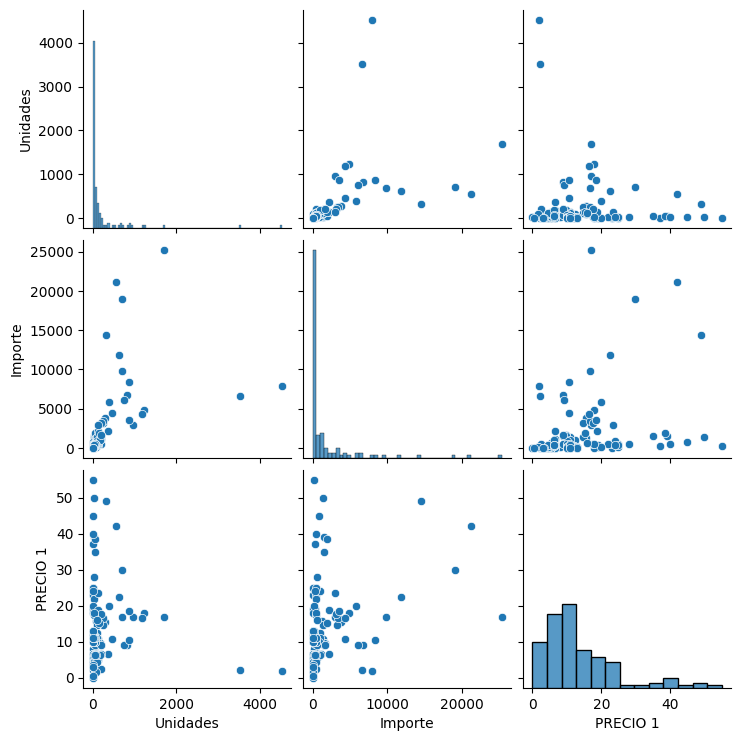

In [41]:
sns.pairplot(junto)

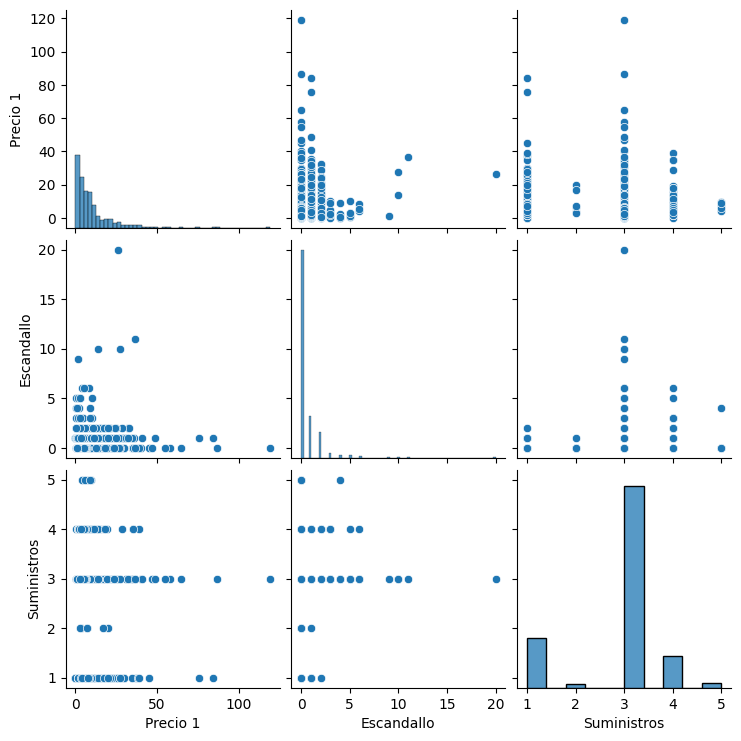

In [42]:
sns.pairplot(compras)

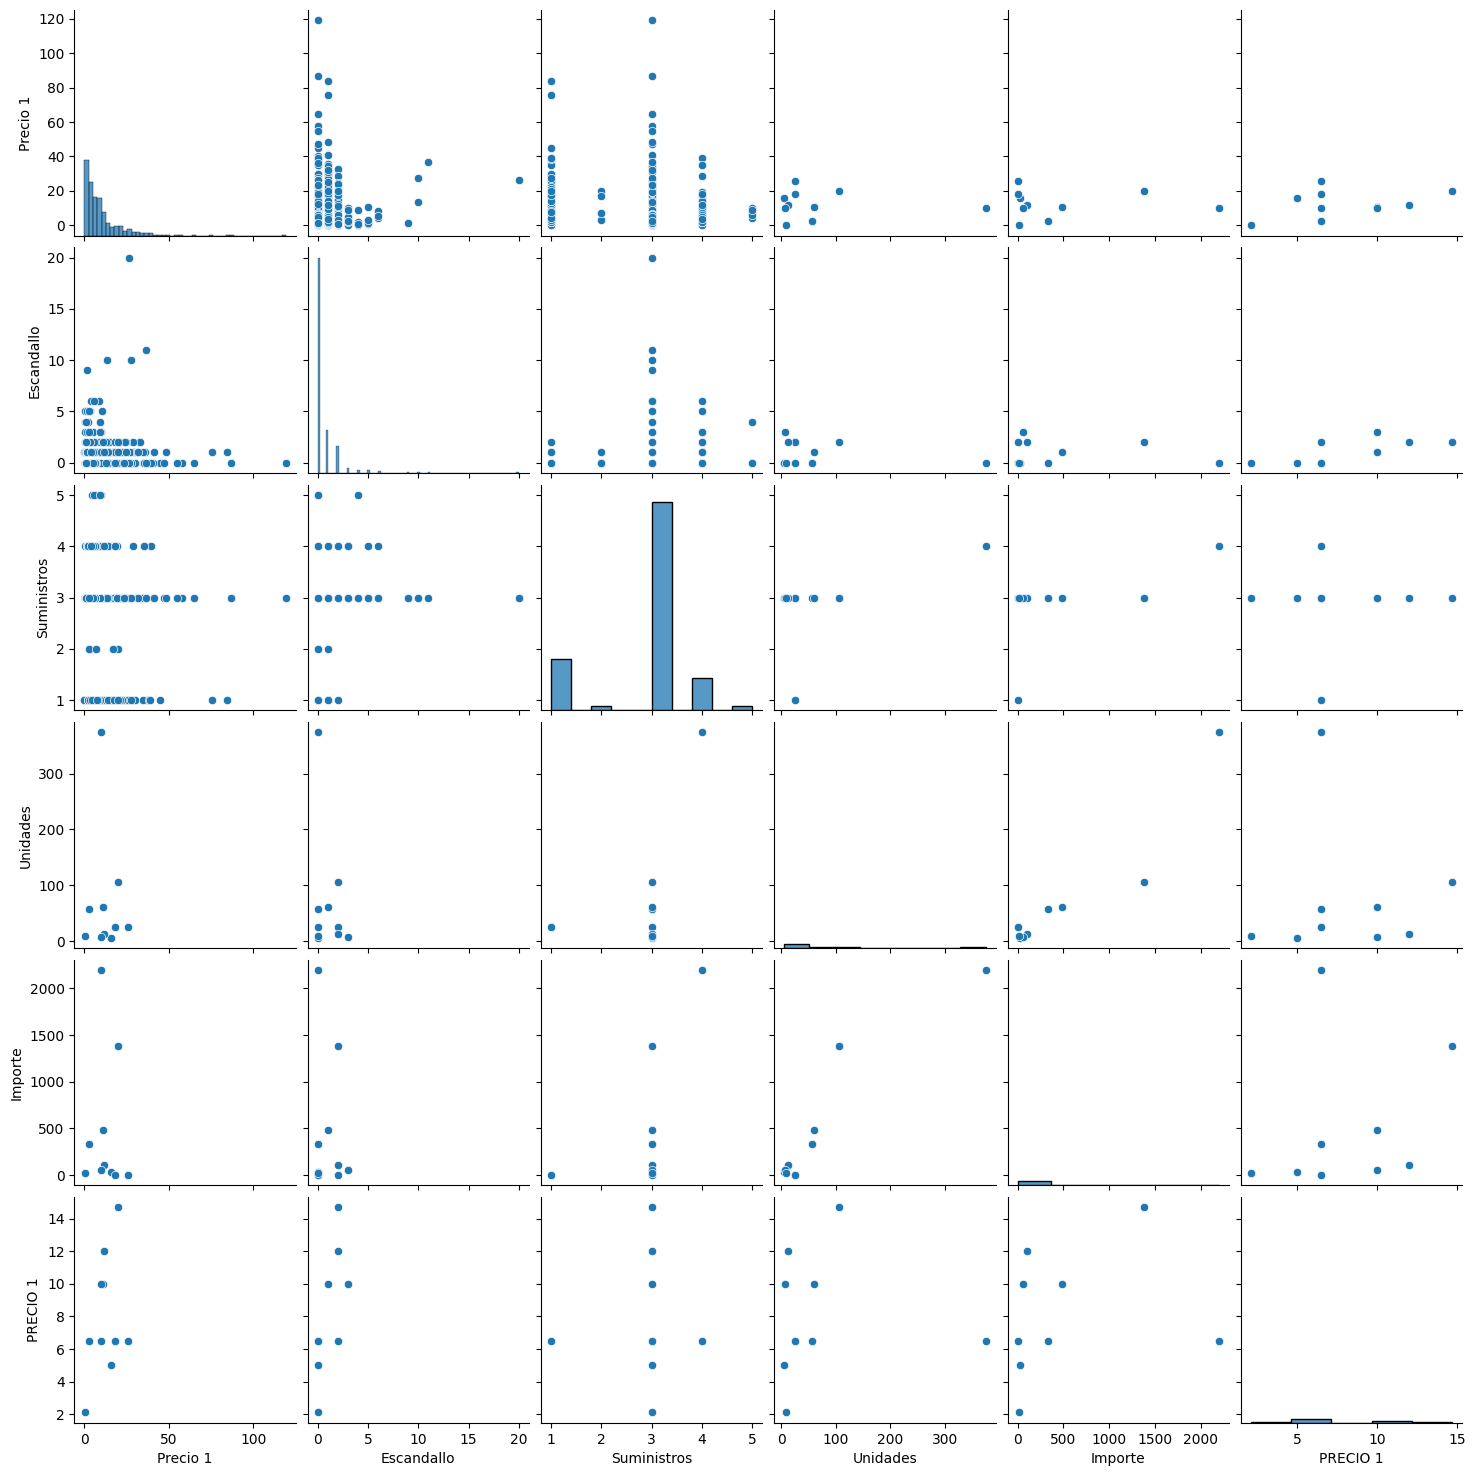

In [301]:
sns.pairplot(final)

<Axes: >

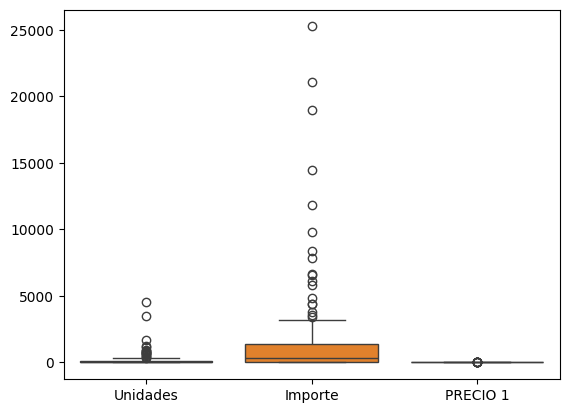

In [45]:
sns.boxplot(junto)

<Axes: >

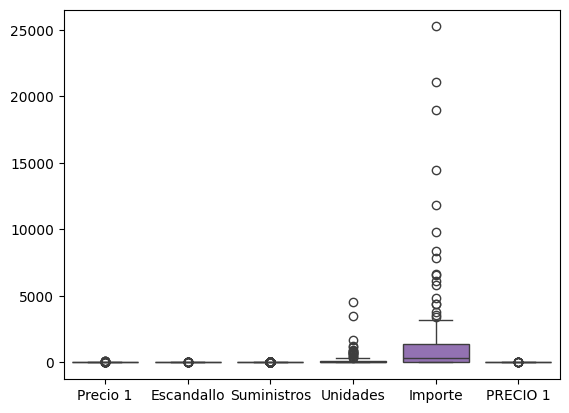

In [311]:
sns.boxplot(final)

<Axes: >

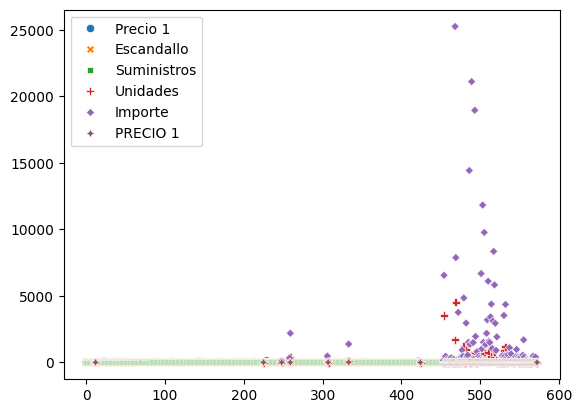

In [48]:
sns.scatterplot(final)

In [47]:
h = final.groupby(['Precio 1', 'PRECIO 1'])

In [49]:
h.describe()

F. Creado                                            \
                      count                 mean                  min   
Precio 1 PRECIO 1                                                       
0.28     2.1              1  2023-08-01 00:00:00  2023-08-01 00:00:00   
2.75     6.5              1  2023-08-01 00:00:00  2023-08-01 00:00:00   
9.90     6.5              1  2023-08-01 00:00:00  2023-08-01 00:00:00   
9.99     10.0             1  2023-08-01 00:00:00  2023-08-01 00:00:00   
10.80    10.0             1  2023-08-01 00:00:00  2023-08-01 00:00:00   
11.66    12.0             1  2023-08-01 00:00:00  2023-08-01 00:00:00   
15.90    5.0              1  2023-09-25 00:00:00  2023-09-25 00:00:00   
18.00    6.5              1  2023-09-14 00:00:00  2023-09-14 00:00:00   
20.00    14.7             1  2023-08-01 00:00:00  2023-08-01 00:00:00   
25.80    6.5              1  2023-11-30 00:00:00  2023-11-30 00:00:00   

                                                             \
                                   25%                  50%   
Precio 1 PRECIO 1                                             
0.28     2.1       2023-08-01 00:00:00  2023-08-01 00:00:00   
2.75     6.5       2023-08-01 00:00:00  2023-08-01 00:00:00   
9.90     6.5       2023-08-01 00:00:00  2023-08-01 00:00:00   
9.99     10.0      2023-08-01 00:00:00  2023-08-01 00:00:00   
10.80    10.0      2023-08-01 00:00:00  2023-08-01 00:00:00   
11.66    12.0      2023-08-01 00:00:00  2023-08-01 00:00:00   
15.90    5.0       2023-09-25 00:00:00  2023-09-25 00:00:00   
18.00    6.5       2023-09-14 00:00:00  2023-09-14 00:00:00   
20.00    14.7      2023-08-01 00:00:00  2023-08-01 00:00:00   
25.80    6.5       2023-11-30 00:00:00  2023-11-30 00:00:00   

                                                                 Escandallo  \
                                   75%                  max  std      count   
Precio 1 PRECIO 1                                                             
0.28     2.1       2023-08-01 00:00:00  2023-08-01 00:00:00  NaN        1.0   
2.75     6.5       2023-08-01 00:00:00  2023-08-01 00:00:00  NaN        1.0   
9.90     6.5       2023-08-01 00:00:00  2023-08-01 00:00:00  NaN        1.0   
9.99     10.0      2023-08-01 00:00:00  2023-08-01 00:00:00  NaN        1.0   
10.80    10.0      2023-08-01 00:00:00  2023-08-01 00:00:00  NaN        1.0   
11.66    12.0      2023-08-01 00:00:00  2023-08-01 00:00:00  NaN        1.0   
15.90    5.0       2023-09-25 00:00:00  2023-09-25 00:00:00  NaN        1.0   
18.00    6.5       2023-09-14 00:00:00  2023-09-14 00:00:00  NaN        1.0   
20.00    14.7      2023-08-01 00:00:00  2023-08-01 00:00:00  NaN        1.0   
25.80    6.5       2023-11-30 00:00:00  2023-11-30 00:00:00  NaN        1.0   

                        ... Unidades     Importe                             \
                  mean  ...      max std   count     mean      min      25%   
Precio 1 PRECIO 1       ...                                                   
0.28     2.1       0.0  ...      9.0 NaN     1.0    17.18    17.18    17.18   
2.75     6.5       0.0  ...     57.0 NaN     1.0   336.83   336.83   336.83   
9.90     6.5       0.0  ...    374.0 NaN     1.0  2198.18  2198.18  2198.18   
9.99     10.0      3.0  ...      7.0 NaN     1.0    57.27    57.27    57.27   
10.80    10.0      1.0  ...     61.0 NaN     1.0   484.55   484.55   484.55   
11.66    12.0      2.0  ...     13.0 NaN     1.0   105.45   105.45   105.45   
15.90    5.0       0.0  ...      6.0 NaN     1.0    27.27    27.27    27.27   
18.00    6.5       2.0  ...     25.0 NaN     1.0     0.00     0.00     0.00   
20.00    14.7      2.0  ...    106.0 NaN     1.0  1384.09  1384.09  1384.09   
25.80    6.5       0.0  ...     25.0 NaN     1.0     0.00     0.00     0.00   

                                                  
                       50%      75%      max std  
Precio 1 PRECIO 1                                 
0.28     2.1         17.18    17.18    